<a href="https://colab.research.google.com/github/SushmitaSingh96/MNIST_dataset_using_CNN/blob/main/MNIST_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [2]:
train_data, val_data, test_data = tfds.load("mnist",  
                                            split=['train[20%:]', 'train[0%:20%]', 'test'],
                                            as_supervised=True)


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [3]:
def helper(ds):
  x, y = [], []
  for x_, y_ in tfds.as_numpy(ds):
    x.append(x_)
    y.append(y_)
  return np.asarray(x), np.asarray(y)

train_images, train_labels = helper(train_data)
val_images, val_labels = helper(val_data)
test_images, test_labels = helper(test_data)

In [4]:
print(train_images.shape)
print(train_labels.shape)
print(val_images.shape)
print(val_labels.shape)

(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)
(12000,)


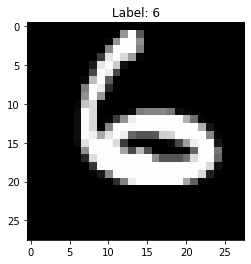

In [5]:
# pick a sample to plot
sample = 10
image = train_images[sample]
#If you are dealing with grayscale images, you should remove the channel dimension for matplotlib:
if image.shape[2] == 1:
    image = image[:, :, 0]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.title("Label: {}".format(train_labels[sample]))
plt.show()
#plt.savefig('randomSample.jpg')

Building the model

In [6]:
from keras.layers import Conv2D, Input, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

model = tf.keras.Sequential()

In [7]:
model_test = tf.keras.Sequential()
model_test.add(Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), padding="same"))
model_test.add(MaxPooling2D(pool_size=(2, 2),padding="valid"))
model_test.add(Conv2D(16, kernel_size=(3,3), activation='relu', padding="same"))
model_test.add(MaxPooling2D(pool_size=(2, 2),padding="valid"))
model_test.add(Conv2D(32, (2,2), activation='relu',padding="same"))

model_test.add(Flatten())

model_test.add(Dense(128, activation='relu'))
model_test.add(Dropout(0.2))
model_test.add(Dense(10, activation='softmax'))

In [8]:
model_test.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [9]:
model_test.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          2080      
                                                                 
 flatten (Flatten)           (None, 1568)             

In [10]:
history_test = model_test.fit(train_images, train_labels, validation_data=[val_images, val_labels], epochs=10)

Epoch 1/10
1500/1500 [==============================] - 40s 25ms/step - loss: 0.4452 - accuracy: 0.9187 - val_loss: 0.1065 - val_accuracy: 0.9694
Epoch 2/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.1001 - accuracy: 0.9704 - val_loss: 0.0887 - val_accuracy: 0.9757
Epoch 3/10
1500/1500 [==============================] - 38s 25ms/step - loss: 0.0715 - accuracy: 0.9786 - val_loss: 0.0810 - val_accuracy: 0.9791
Epoch 4/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0620 - accuracy: 0.9808 - val_loss: 0.0634 - val_accuracy: 0.9814
Epoch 5/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0484 - accuracy: 0.9845 - val_loss: 0.0649 - val_accuracy: 0.9830
Epoch 6/10
1500/1500 [==============================] - 36s 24ms/step - loss: 0.0466 - accuracy: 0.9856 - val_loss: 0.0827 - val_accuracy: 0.9787
Epoch 7/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0427 - accuracy: 0.9866 - val_loss: 0.0554 -

Text(0.5, 0, 'epochs')

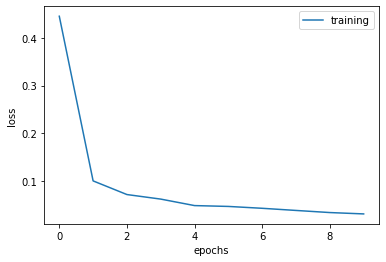

In [11]:
plt.plot(history_test.history['loss'], label="training")
#plt.plot(history_test.history['val_loss'], label="validation")
plt.legend()
plt.ylabel("loss")
plt.xlabel("epochs")

In [12]:
model_test.evaluate(test_images, test_labels)

313/313 [==============================] - 5s 16ms/step - loss: 0.0745 - accuracy: 0.9835


[0.07448329776525497, 0.9835000038146973]